In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"C:\Users\Naren\Downloads\air cargo supplychain.xlsx")

In [3]:
df.head()

,Shipment ID,Origin Airport,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Day of Week,Delay Status
0,SHIP000001,SFO,LHR,655.03,7.80,1238.23,Air,UPS,16,No,Yes,7,Clear,Thursday,Delayed
1,SHIP000002,ATL,SIN,988.60,37.41,1868.80,Air,Lufthansa Cargo,21,No,No,5,Clear,Thursday,On-Time
2,SHIP000003,DFW,HKG,637.71,10.53,1205.49,Air,FedEx,6,No,No,36,Clear,Wednesday,On-Time
3,SHIP000004,SFO,DXB,367.47,7.70,694.65,Rail,DHL,17,Yes,No,16,Rainy,Sunday,On-Time
4,SHIP000005,ORD,HKG,671.23,3.59,1268.86,Air,DHL,36,No,No,3,Rainy,Friday,Delayed


In [4]:
df.isna().sum()

Shipment ID                       0
Origin Airport                    0
Destination Airport               0
Shipment Weight (kg)              0
Shipment Volume (m³)              0
Freight Cost (USD)                0
Mode of Transport                 0
Carrier Name                      0
Transit Time (hours)              0
Temperature-Sensitive             0
Perishable Goods                  0
Customs Clearance Time (hours)    0
Weather Conditions                0
Day of Week                       0
Delay Status                      0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
# Drop unnecessary columns
df.drop(columns=['Shipment ID'], inplace=True)

# Encode target variable ('Delay Status')
df['Delay Status'] = df['Delay Status'].map({'On-Time': 0, 'Delayed': 1})

# Select numerical features
numerical_features = ['Shipment Weight (kg)', 'Shipment Volume (m³)',
                       'Transit Time (hours)', 'Customs Clearance Time (hours)','Freight Cost (USD)']

# Select categorical features
categorical_features = ['Origin Airport', 'Destination Airport', 'Mode of Transport', 'Carrier Name',
                         'Temperature-Sensitive', 'Perishable Goods', 'Weather Conditions', 'Day of Week']

# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)


In [6]:
X = df.iloc[:, :-1]   
y= df.iloc[:, -1] 

In [7]:
X

,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Transit Time (hours),Customs Clearance Time (hours),Delay Status,Origin Airport_DFW,Origin Airport_JFK,Origin Airport_LAX,Origin Airport_MIA,...,Temperature-Sensitive_Yes,Perishable Goods_Yes,Weather Conditions_Foggy,Weather Conditions_Rainy,Weather Conditions_Stormy,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday
0,655.03,7.80,1238.23,16,7,1,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,988.60,37.41,1868.80,21,5,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,637.71,10.53,1205.49,6,36,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,367.47,7.70,694.65,17,16,0,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
4,671.23,3.59,1268.86,36,3,1,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,158.99,10.97,300.55,36,32,1,False,False,False,False,...,True,True,False,False,False,True,False,False,False,False
19996,655.74,42.92,1239.58,46,28,0,False,False,False,True,...,True,False,True,False,False,False,False,False,False,False
19997,711.80,29.54,1345.55,30,16,0,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False
19998,147.04,4.38,277.96,16,19,0,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [8]:
y

0        False
1        False
2         True
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: Day of Week_Wednesday, Length: 20000, dtype: bool

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

In [10]:
#feature scaling to make prediction accurate
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(X_test)
y_pred

array([False, False,  True, ..., False, False,  True])

In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Optimized Logistic Regression Accuracy: {accuracy:.4f}')

Optimized Logistic Regression Accuracy: 0.8475


In [14]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier(criterion='entropy')# entropy controls how a decision tree decides to split the data
Classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [15]:
y_pred=Classifier.predict(X_test)
y_pred

array([False, False,  True, ..., False, False, False])

0.8565

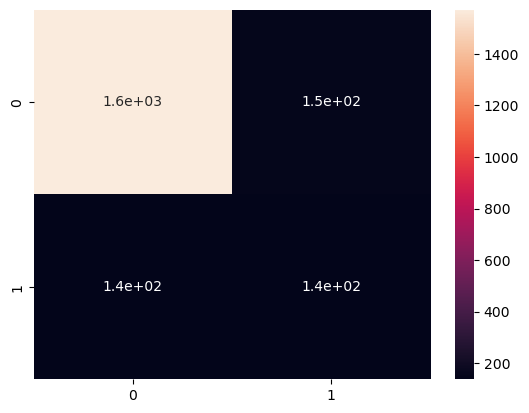

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
accuracy_score(y_test,y_pred)

In [17]:
from sklearn.datasets import load_iris # iris helps to classifi diff datasets
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
Classifier = tree.DecisionTreeClassifier()
Classifier = Classifier.fit(X, y)

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

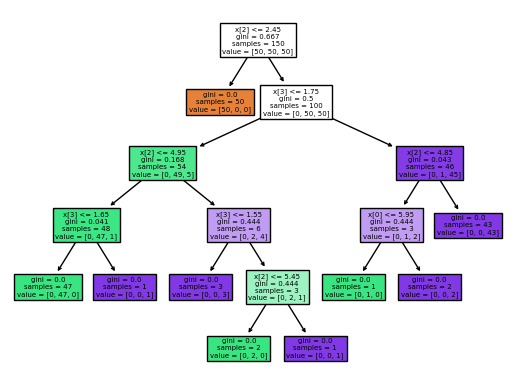

In [18]:
tree.plot_tree(Classifier,filled=True)

In [19]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,f1_score

rf_classifier = RandomForestClassifier( )

rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_pred = rf_classifier.predict(X_test)
y_pred

array([False, False, False, ..., False, False,  True])

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.4f}')
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.8595
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.95      0.92      1722
        True       0.49      0.28      0.35       278

    accuracy                           0.86      2000
   macro avg       0.69      0.62      0.64      2000
weighted avg       0.84      0.86      0.84      2000



In [22]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)  # Default: binary classification

print(f'Random Forest Accuracy: {accuracy:.4f}')
print(f'F1-Score: {f1:.4f}')
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.8595
F1-Score: 0.3540
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.95      0.92      1722
        True       0.49      0.28      0.35       278

    accuracy                           0.86      2000
   macro avg       0.69      0.62      0.64      2000
weighted avg       0.84      0.86      0.84      2000



In [23]:
# XG Boost
!pip install xgboost

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
xgb_classifier = XGBClassifier(n_estimators=300, max_depth=6, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb_classifier.fit(X_train, y_train)

C:\Users\Naren\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:19:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [25]:
y_pred = xgb_classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [26]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'XGBoost Accuracy: {accuracy:.4f}')
print(f'F1-Score: {f1:.4f}')
print("Classification Report:\n", classification_report(y_test, y_pred))

XGBoost Accuracy: 0.8470
F1-Score: 0.4632
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.91      0.91      1722
        True       0.45      0.47      0.46       278

    accuracy                           0.85      2000
   macro avg       0.68      0.69      0.69      2000
weighted avg       0.85      0.85      0.85      2000



In [27]:
# Ada boost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score


In [28]:
ada_classifier = AdaBoostClassifier(n_estimators=300, learning_rate=0.1, random_state=42)
ada_classifier.fit(X_train, y_train)

C:\Users\Naren\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.1, n_estimators=300, random_state=42)

In [29]:
y_pred = ada_classifier.predict(X_test)

In [30]:
y_pred

array([False, False,  True, ..., False, False,  True])

In [31]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'AdaBoost Accuracy: {accuracy:.4f}')
print(f'F1-Score: {f1:.4f}')
print("Classification Report:\n", classification_report(y_test, y_pred))

AdaBoost Accuracy: 0.8540
F1-Score: 0.5423
Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.89      0.91      1722
        True       0.48      0.62      0.54       278

    accuracy                           0.85      2000
   macro avg       0.71      0.76      0.73      2000
weighted avg       0.87      0.85      0.86      2000

